In [5]:
import test
from jinja2 import Template
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

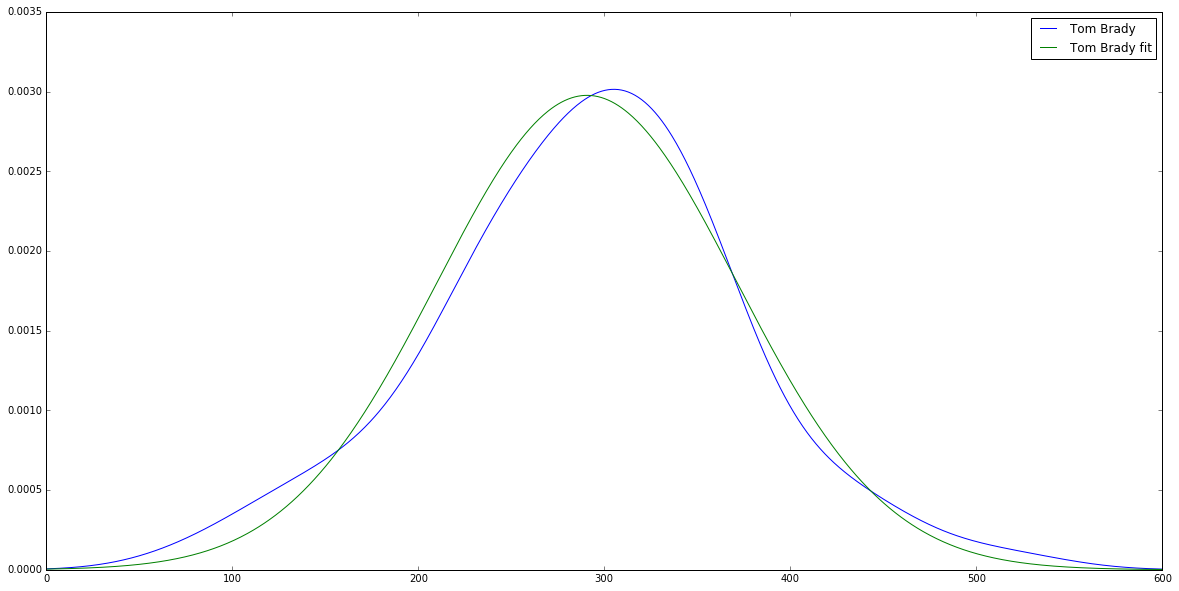

In [6]:
reload(test)
from scipy.stats import norm

with open('sql/brady_test.sql') as f:
    template = Template(f.read())

players = [
    'Tom Brady',
#    'Blake Bortles',
]

plt.figure(figsize=(20,10))
for p in players:

    q = template.render(full_name=p)
    results = pd.read_sql(q, test.conn)
    data = list(results['yards'])
    bin_size = 25
    x,y,bins = test.fit_histogram(data, bin_size)
    
    plt.plot(x,y, label=p)
    mu, std = norm.fit(data)
    y2 = norm.pdf(x, mu, std)
    tot = sum(y2)
    y2 = [a/tot for a in y2]
    plt.plot(x, y2, label='{} fit'.format(p))
    plt.legend()
    
    #plt.hist([j - bin_size/2 for j in data], normed=True, bins=bins)


----
2011
[357, 361, 198, 338, 517, 423, 320, 387, 329, 234, 226, 321, 293, 342, 304, 289]
avg: 327.4375
var: 75.0099732952
----
2012
[296, 295, 304, 284, 236, 316, 443, 335, 237, 331, 340, 223, 238, 267, 259, 395]
avg: 299.9375
var: 58.3293116173
----
2013
[418, 344, 122, 116, 364, 185, 288, 220, 296, 316, 371, 197, 432, 172, 228, 269]
avg: 271.125
var: 96.1118326482
----
2014
[317, 349, 354, 80, 287, 249, 149, 234, 257, 159, 292, 245, 333, 261, 182, 361]
avg: 256.8125
var: 78.7259635937
----
2015
[226, 356, 280, 134, 288, 267, 466, 334, 358, 277, 275, 312, 299, 355, 231, 312]
avg: 298.125
var: 70.2894684501


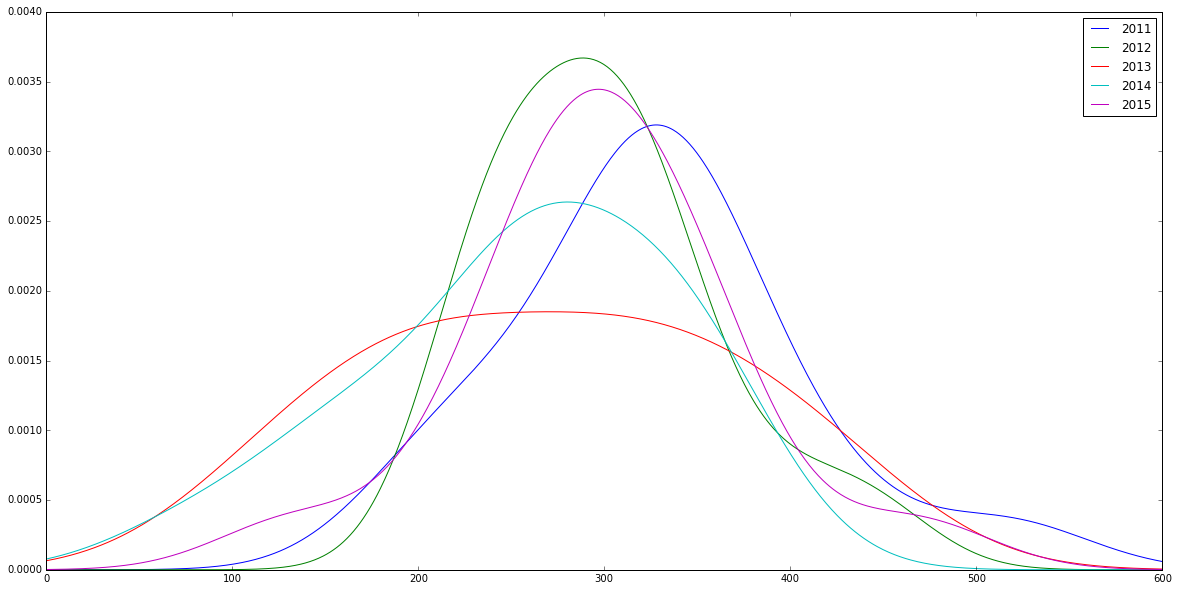

In [7]:
reload(test)
with open('sql/passing_yds_per_game.sql.j2') as f:
    template = Template(f.read())

years = [2011, 2012, 2013, 2014, 2015]

plt.figure(figsize=(20,10))
for year in years:

    q = template.render(full_name='Tom Brady', year=year)
    results = pd.read_sql(q, test.conn)
    data = list(results['yards'])
    print '----'
    print year
    print data
    print 'avg:', np.average(data)
    print 'var:', np.std(data)
    bin_size = 25
    x,y,bins = test.fit_histogram(data, bin_size)
    
    plt.plot(x,y, label=year)
    plt.legend()


In [10]:
reload(test)
import matplotlib.animation as animation
with open('sql/brady_test.sql') as f:
    template = Template(f.read())

q = template.render(full_name='Tom Brady')
results = pd.read_sql(q, test.conn)


game_range = 16
bin_size = 25

results = results.sort_values(by=['year', 'week'])

start = 0
end = len(results) - game_range

fig = plt.figure(figsize=(10,5))
ax = plt.axes(xlim=(0,600), ylim=(0, .01))
line, = ax.plot([], [], lw=2)
line2, = ax.plot([], [], lw=2)


def init():
    line.set_data([],[])
    line2.set_data([],[])
    return (line,line2) + (None,)

def animate(i):
    
    # running (last 16 games)
    data = list(results['yards'])[i:i+game_range+1]
    x,y,bins = test.fit_histogram(data, bin_size)
    line.set_data(x,y)
    
    # cumulative (all games)
    data2 = list(results['yards'])[0:17 + i]
    x2,y2,bins2 = test.fit_histogram(data2, bin_size)
    line2.set_data(x2,y2)
    
    return (line, line2) + (None,)

ani = animation.FuncAnimation(fig, animate, init_func=init, frames=range(end), interval=1000)  
print ani._interval
display_animation(ani)

1000


In [8]:
from tempfile import NamedTemporaryFile

VIDEO_TAG = """<video controls>
 <source src="data:video/x-m4v;base64,{0}" type="video/mp4">
 Your browser does not support the video tag.
</video>"""

def anim_to_html(anim):
    if not hasattr(anim, '_encoded_video'):
        with NamedTemporaryFile(suffix='.mp4') as f:
            anim.save(f.name, fps=4, extra_args=['-vcodec', 'libx264'])
            video = open(f.name, "rb").read()
        anim._encoded_video = video.encode("base64")
    
    return VIDEO_TAG.format(anim._encoded_video)

In [9]:
from IPython.display import HTML

def display_animation(anim):
    plt.close(anim._fig)
    return HTML(anim_to_html(anim))

[126, 38, 185, 31, 122, 102, 95, 128, 81, 113, 18, 80, 84, 71, 35]
[22, 45, 45, 110, 81, 119, 70, 82, 45, 45, 123, 53]
[217, 131, 48, 184, 38, 53, 155, 158, 77, 73, 46, 79, 44, 133, 55, 116]
[50, 77, 83, 99, 79, 74, 64, 19, 22, 88, 17, 81, 159, 117, 88, 149]
[90, 74, 70, 112, 41, 29, 89, 68, 112, 16, 82, 112]


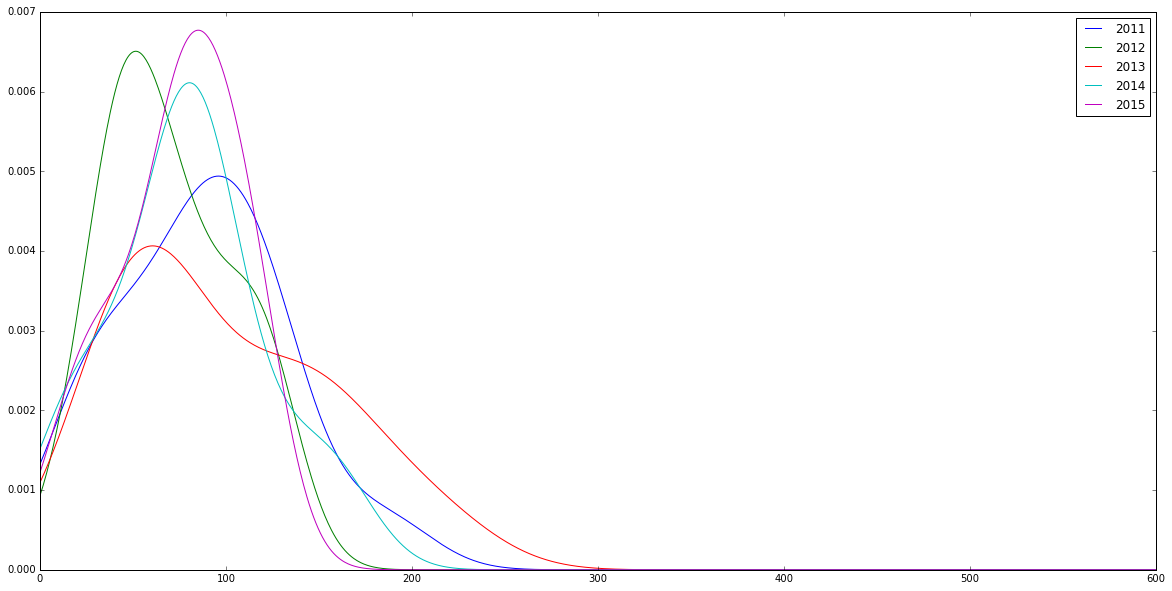

In [11]:
reload(test)
with open('sql/rushing_yds_per_game.sql') as f:
    template = Template(f.read())

years = [2011, 2012, 2013, 2014, 2015]

plt.figure(figsize=(20,10))
for year in years:

    q = template.render(full_name='LeSean McCoy', year=year)
    results = pd.read_sql(q, test.conn)
    data = list(results['yards'])
    print data
    bin_size = 25
    x,y,bins = test.fit_histogram(data, bin_size)
    
    plt.plot(x,y, label=year)
    plt.legend()
    
    #plt.hist([j - bin_size/2 for j in data], normed=True, bins=bins)


----
2011
[357, 361, 198, 338, 517, 423, 320, 387, 329, 234, 226, 321, 293, 342, 304, 289]
avg: 327.4375
var: 75.0099732952
----
2012
[296, 295, 304, 284, 236, 316, 443, 335, 237, 331, 340, 223, 238, 267, 259, 395]
avg: 299.9375
var: 58.3293116173
----
2013
[418, 344, 122, 116, 364, 185, 288, 220, 296, 316, 371, 197, 432, 172, 228, 269]
avg: 271.125
var: 96.1118326482
----
2014
[317, 349, 354, 80, 287, 249, 149, 234, 257, 159, 292, 245, 333, 261, 182, 361]
avg: 256.8125
var: 78.7259635937
----
2015
[226, 356, 280, 134, 288, 267, 466, 334, 358, 277, 275, 312, 299, 355, 231, 312]
avg: 298.125
var: 70.2894684501


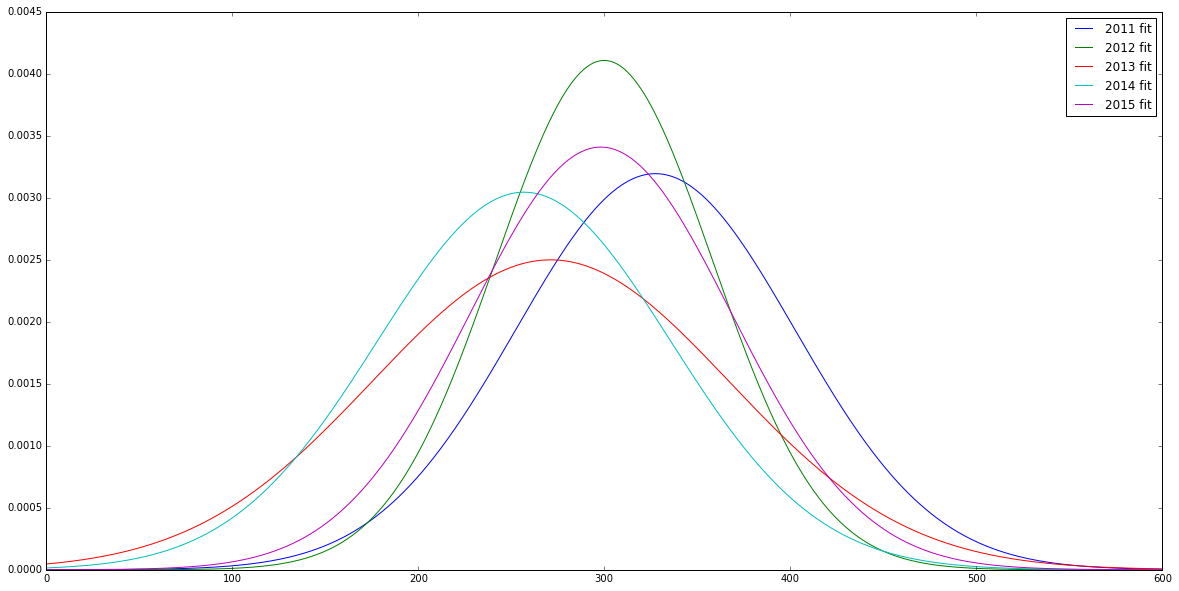

In [12]:
reload(test)
with open('sql/passing_yds_per_game.sql.j2') as f:
    template = Template(f.read())

years = [2011, 2012, 2013, 2014, 2015]

plt.figure(figsize=(20,10))
for year in years:

    q = template.render(full_name='Tom Brady', year=year)
    results = pd.read_sql(q, test.conn)
    data = list(results['yards'])
    print '----'
    print year
    print data
    print 'avg:', np.average(data)
    print 'var:', np.std(data)
    bin_size = 25
    x,y,bins = test.fit_histogram(data, bin_size)
    
    #plt.plot(x,y, label=year)
    
    mu, std = norm.fit(data)
    y2 = norm.pdf(x, mu, std)
    tot = sum(y2)
    y2 = [a/tot for a in y2]
    plt.plot(x, y2, label='{} fit'.format(year))
    
    plt.legend()


[126, 38, 185, 31, 122, 102, 95, 128, 81, 113, 18, 80, 84, 71, 35]
13.2968963051 -73.5312518777 12.0928909497
[22, 45, 45, 110, 81, 119, 70, 82, 45, 45, 123, 53]
3.22163023783 9.46177999605 18.7911770152
[50, 77, 83, 99, 79, 74, 64, 19, 22, 88, 17, 81, 159, 117, 88, 149]
30.1060147812 -139.124197556 7.24935526981
[90, 74, 70, 112, 41, 29, 89, 68, 112, 16, 82, 112]
262.251790257 -433.948206855 1.93768121032


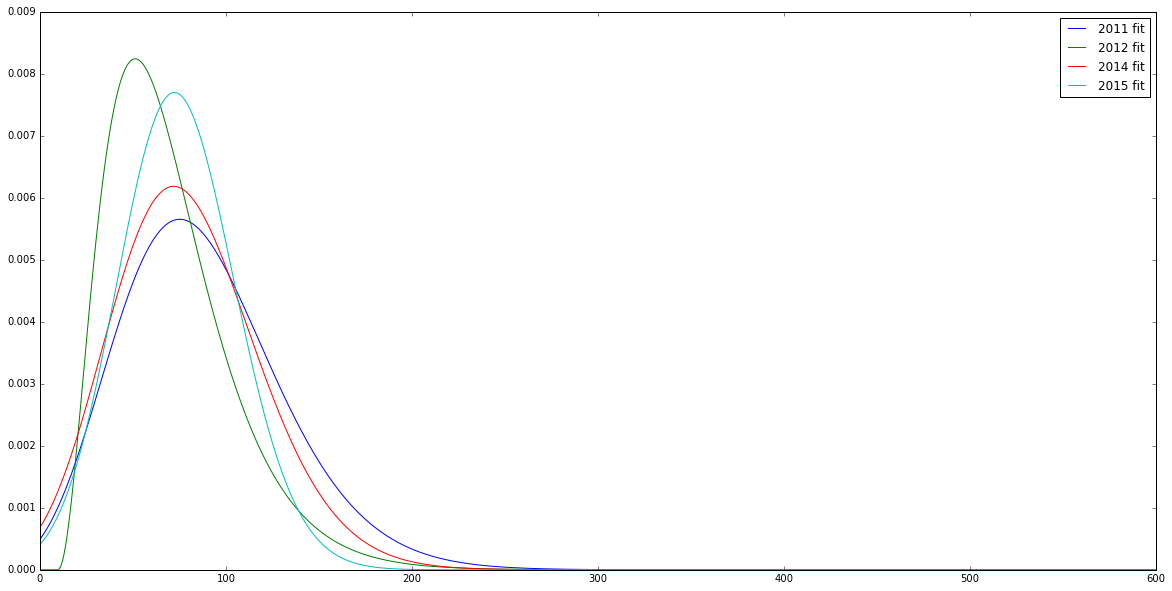

In [19]:
reload(test)
from scipy.stats import gamma
with open('sql/rushing_yds_per_game.sql') as f:
    template = Template(f.read())

# years = [2011, 2012, 2013, 2014, 2015]
years = [2011, 2012, 2014, 2015]

plt.figure(figsize=(20,10))
for year in years:

    q = template.render(full_name='LeSean McCoy', year=year)
    results = pd.read_sql(q, test.conn)
    data = list(results['yards'])
    print data
    bin_size = 25
    x,y,bins = test.fit_histogram(data, bin_size)
    
    #plt.plot(x,y, label=year)
    
    a,l,b = gamma.fit(data)
    print a, l, b
    rv = gamma(a,l,b)
    y2 = rv.pdf(x)
    tot = sum(y2)
    y2 = [a/tot for a in y2]
    plt.plot(x, y2, label='{} fit'.format(year))
    
    
    plt.legend()
    
    #plt.hist([j - bin_size/2 for j in data], normed=True, bins=bins)

In [15]:
import scipy.stats

In [16]:
data
bin_size = 25
z = scipy.stats.gaussian_kde(data)
y = z(x)
c = scipy.stats.rv_discrete(name='custom', values=(x,y))
y2 = c.rvs(size=len(y))
print min(data), np.mean(data), max(data)
print min(y2), np.mean(y2), max(y2)


18 87.2666666667 185
0 59.393 104


In [1]:
reload(test)
from scipy.stats import gamma
with open('sql/rushing_yds_per_game.sql') as f:
    template = Template(f.read())

years = [2011, 2012, 2013, 2014, 2015]
# years = [2011]

plt.figure(figsize=(20,10))
for year in years:

    q = template.render(full_name='LeSean McCoy', year=year)
    results = pd.read_sql(q, test.conn)
    data = list(results['yards'])
    print data
    bin_size = 25
    
    x,y,bins = test.fit_histogram(data, bin_size)
    
    c = scipy.stats.rv_discrete(name='custom', values=(x,y))
    yf = c.rvs(size=len(y))
    #print min(data), np.mean(data), max(data)
    #print min(yf), np.mean(yf), max(yf)
    
    a,l,b = gamma.fit(yf)
    print a, l, b
    rv = gamma(a,l,b)
    y2 = rv.pdf(x)
    tot = sum(y2)
    y2 = [a/tot for a in y2]
    plt.plot(x, y2, label='{} fit'.format(year))
    
    #plt.plot(x,y, label=year)
    
    a,l,b = gamma.fit(data)
    #print a, l, b
    rv = gamma(a,l,b)
    y2 = rv.pdf(x)
    tot = sum(y2)
    y2 = [a/tot for a in y2]
    #plt.plot(x, y2, label='{} fit'.format(year))
    
    
    plt.legend()
    
    #plt.hist([j - bin_size/2 for j in data], normed=True, bins=bins)

NameError: name 'test' is not defined